In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train_data = pd.read_excel(r"/Users/chideranwankwo/Desktop/Flight_Price_resources/Data_Train.xlsx")

In [7]:
train_data.info()  #notice that route and total stops have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train_data.isnull().sum() #boolean DB that checks if a value is null... false means it is not empty

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [10]:
train_data[train_data['Total_Stops'].isnull()] #this filters the exact rows in total stops that have the missing values(s)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [12]:
train_data.dropna(inplace=True)

In [13]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
data = train_data.copy()

In [15]:
def change_into_dateTime(col):   #this function converts the listed features intomdat and time datatypes
   data[col]=  pd.to_datetime(data[col])

In [16]:
train_data.info(memory_usage="deep") # more accurate memory

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


In [17]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [18]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [19]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_dateTime(feature)

In [20]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [21]:
data["journey_Day"] = data['Date_of_Journey'].dt.day   #add the derived attribute from the Date_of_Journey feature into the data set

In [22]:
data["journey_Month"] = data['Date_of_Journey'].dt.month

In [23]:
data["journey_Year"] = data['Date_of_Journey'].dt.year

In [26]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Day,journey_Month,journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-03-13 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-03-13 05:50:00,2025-03-13 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [31]:
def extract_hour_min(df, col):
  df[col+"_Hour"] = df[col].dt.hour
  df[col+"_Minute"]= df[col].dt.minute
  return df.head(2)
    

In [36]:
extract_hour_min(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Day,journey_Month,journey_Year,Dep_Time_Hour,Dep_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-03-13 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-03-13 05:50:00,2025-03-13 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [39]:
extract_hour_min(data, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Day,journey_Month,journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-03-13 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-03-13 05:50:00,2025-03-13 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [43]:
col_to_drop =['Dep_Time', 'Arrival_Time']
data.drop(col_to_drop, axis= 1, inplace= True)

In [46]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Day,journey_Month,journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10


In [48]:
def flight_departure_time(x):
    if (x > 4) and (x <= 8):
        return "Early Morning"
    
    elif (x > 8) and (x <= 12):
        return "Morning"
    
    elif (x > 12) and (x <= 16):
        return "Noon"
    
    elif (x > 16) and (x <= 20):
        return "Evening"
    
    elif (x > 20) and (x <= 24):
        return "Night"

    else:
        return "Late Night"    

In [51]:
data['Dep_Time_Hour'].apply(flight_departure_time).value_counts()

Dep_Time_Hour
Early Morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
Late Night        465
Name: count, dtype: int64

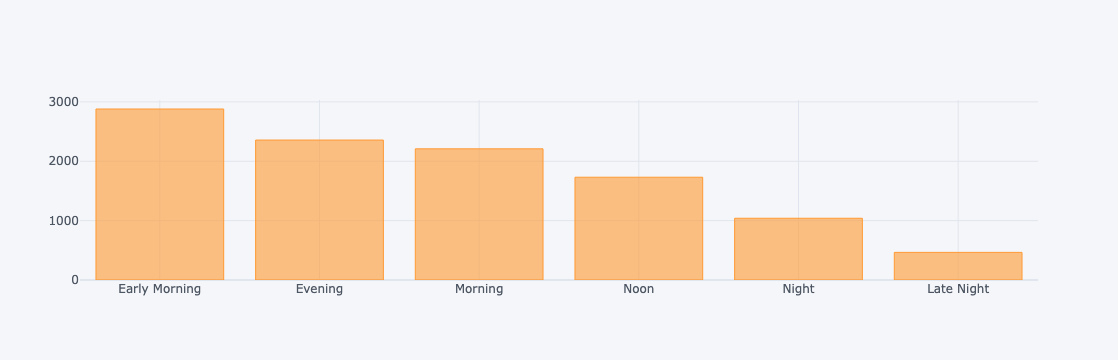

In [64]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs

init_notebook_mode(connected=True)  # Enables interactive plots in Jupyter Notebook
cf.go_offline()  # Allows Cufflinks to work without an internet connection

data['Dep_Time_Hour'].apply(flight_departure_time).value_counts().iplot( kind="bar")


In [103]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h ' + x  
    elif 'm' not in x:  
        x = x + ' 0m'  
    return x


In [105]:
data['Duration']= data['Duration'].apply(preprocess_duration)

In [111]:
data['Duration_Hours']= data['Duration'].apply(lambda x :int(x.split(' ')[0][0:-1]) )

In [113]:
data['Duration_Mins']=data['Duration'].apply(lambda x :int(x.split(' ')[1][0:-1]) )

In [115]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Day,journey_Month,journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Hours,Duration_Mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,7,25
